In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Prior to the use of this notebook we ran 10 iterations of the luxembourg simulations in three cases: Before our spatial fix, after our spatial fix and after our spatial fix with interventions. Each set of simulations are run starting from 5 infected individuals in a cell selected to be equidistant from the urban and rural regions, this input file can be found as `luxembourg_input/luxembourg_adapted_5_in_cell_input.csv`. The outputs of these simulations are stored in the folder `simulation_outputs/large_csv`.

First we read and process the results for the simulations without interventions and post our spatial fix, the simulation file that needs to be run for these simulations is `luxembourg_repeat_sims_loc_cst.py`:

In [7]:
combined_df = pd.DataFrame()
combined_df_prop = pd.DataFrame()

for i in (range(1, 11)):
    filename = os.path.join(os.path.abspath(''),
                            "simulation_outputs/large_csv",
                            "population_output_simulation_{}.csv".format(i))
    df = pd.read_csv(filename)

    rural = df.loc[(df['location_y'] < 49.81) & (df['location_y'] > 49.78) & (df['location_x'] < 6.184) & (df['location_x'] > 6.158)]
    urban = df.loc[(df['location_y'] < 49.626) & (df['location_y'] > 49.599) & (df['location_x'] < 6.142) & (df['location_x'] > 6.116)]

    sum_rural_all = rural.loc[rural['time']==0].sum()
    sum_urban_all = urban.loc[urban['time']==0].sum()

    sum_rural = sum(sum_rural_all[5:])
    sum_urban = sum(sum_urban_all[5:])

    rural_I = rural[list(rural.filter(regex='InfectionStatus.Infect'))]
    rural["Infected"] = rural_I.sum(axis=1)
    rural = rural.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df["rural_{}".format(i)] = rural["Infected"]
    combined_df_prop["rural_{}".format(i)] = [(x/sum_rural) for x in rural["Infected"]]

    urban_I = urban[list(urban.filter(regex='InfectionStatus.Infect'))]
    urban["Infected"] = urban_I.sum(axis=1)
    urban = urban.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df["urban_{}".format(i)] = urban["Infected"]
    combined_df_prop["urban_{}".format(i)] = [(x/sum_urban) for x in urban["Infected"]]

summary_df = pd.DataFrame()

all_rural = combined_df[list(combined_df.filter(regex='rural'))]
all_urban = combined_df[list(combined_df.filter(regex='urban'))]
all_rural_prop = combined_df_prop[list(combined_df_prop.filter(regex='rural'))]
all_urban_prop = combined_df_prop[list(combined_df_prop.filter(regex='urban'))]

summary_df["rural"] = all_rural.mean(axis=1)
summary_df["sd_rural"] = all_rural.std(axis=1)
summary_df["urban"] = all_urban.mean(axis=1)
summary_df["sd_urban"] = all_urban.std(axis=1)
summary_df["rural_prop"] = all_rural_prop.mean(axis=1)
summary_df["sd_rural_prop"] = all_rural_prop.std(axis=1)
summary_df["urban_prop"] = all_urban_prop.mean(axis=1)
summary_df["sd_urban_prop"] = all_urban_prop.std(axis=1)

time_list = []
for i in range(len(summary_df["rural"])):
    time_list.append(i)

summary_df["time"] = time_list
summary_df.to_csv("simulation_outputs/urban_rural_summary.csv", index=False)

/tmp/ipykernel_19042/3769301592.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural["Infected"] = rural_I.sum(axis=1)
/tmp/ipykernel_19042/3769301592.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban["Infected"] = urban_I.sum(axis=1)
/tmp/ipykernel_19042/3769301592.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Next we read and process the results for the simulations with interventions and post our spatial fix, the simulation file that needs to be run for these simulations is `luxembourg_repeat_sims_loc_cst_interventions.py`: Interventions include case isolation, household quarantine, and social distancing.

In [8]:
combined_df_int = pd.DataFrame()
combined_df_int_prop = pd.DataFrame()

for i in (range(1,11)):
    filename = os.path.join(os.path.abspath(''),
                            "simulation_outputs/large_csv",
                            "population_output_intervention_simulation_{}.csv".format(i))
    df = pd.read_csv(filename)

    rural = df.loc[(df['location_y'] < 49.81) & (df['location_y'] > 49.78) & (df['location_x'] < 6.184) & (df['location_x'] > 6.158)]
    urban = df.loc[(df['location_y'] < 49.626) & (df['location_y'] > 49.599) & (df['location_x'] < 6.142) & (df['location_x'] > 6.116)]

    sum_rural_all = rural.loc[rural['time']==0].sum()
    sum_urban_all = urban.loc[urban['time']==0].sum()

    sum_rural = sum(sum_rural_all[5:])
    sum_urban = sum(sum_urban_all[5:])

    rural_I = rural[list(rural.filter(regex='InfectionStatus.Infect'))]
    rural["Infected"] = rural_I.sum(axis=1)
    rural = rural.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_int["rural_{}".format(i)] = rural["Infected"]
    combined_df_int_prop["rural_{}".format(i)] = [(x/sum_rural) for x in rural["Infected"]]

    urban_I = urban[list(urban.filter(regex='InfectionStatus.Infect'))]
    urban["Infected"] = urban_I.sum(axis=1)
    urban = urban.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_int["urban_{}".format(i)] = urban["Infected"]
    combined_df_int_prop["urban_{}".format(i)] = [(x/sum_urban) for x in urban["Infected"]]

summary_df_int = pd.DataFrame()

all_rural = combined_df_int[list(combined_df_int.filter(regex='rural'))]
all_urban = combined_df_int[list(combined_df_int.filter(regex='urban'))]
all_rural_prop = combined_df_int_prop[list(combined_df_int_prop.filter(regex='rural'))]
all_urban_prop = combined_df_int_prop[list(combined_df_int_prop.filter(regex='urban'))]

summary_df_int["rural"] = all_rural.mean(axis=1)
summary_df_int["sd_rural"] = all_rural.std(axis=1)
summary_df_int["urban"] = all_urban.mean(axis=1)
summary_df_int["sd_urban"] = all_urban.std(axis=1)
summary_df_int["rural_prop"] = all_rural_prop.mean(axis=1)
summary_df_int["sd_rural_prop"] = all_rural_prop.std(axis=1)
summary_df_int["urban_prop"] = all_urban_prop.mean(axis=1)
summary_df_int["sd_urban_prop"] = all_urban_prop.std(axis=1)

time_list = []
for i in range(len(summary_df_int["rural"])):
    time_list.append(i)

summary_df_int["time"] = time_list
summary_df_int.to_csv("simulation_outputs/urban_rural_summary_interventions.csv", index=False)

/tmp/ipykernel_19042/3813378279.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural["Infected"] = rural_I.sum(axis=1)
/tmp/ipykernel_19042/3813378279.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban["Infected"] = urban_I.sum(axis=1)
/tmp/ipykernel_19042/3813378279.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Finally, we plot the results comparing the effect of the interventions on the rural vs the urban populations.

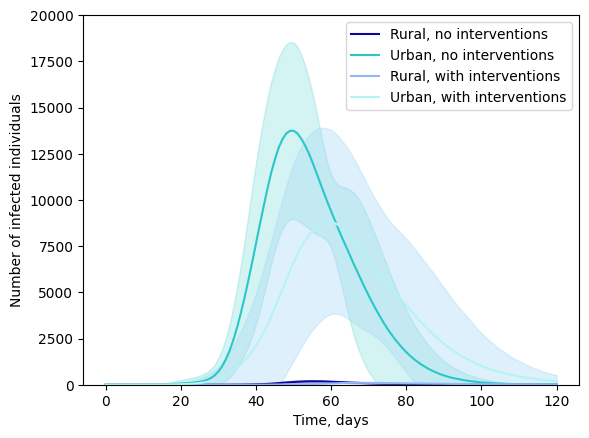

In [9]:
colour_list = ['#0F05A0', '#94B7F8', '#2AC7C7', '#B5F4F4']

plt.figure()
plt.plot(summary_df['time'], summary_df['rural'], color = '#0F05A0', label='Rural, no interventions')
plt.plot(summary_df['time'], summary_df['urban'], color = '#2AC7C7', label='Urban, no interventions')
plt.plot(summary_df_int['time'], summary_df_int['rural'], color = '#94B7F8', label='Rural, with interventions')
plt.plot(summary_df_int['time'], summary_df_int['urban'], color = '#B5F4F4', label='Urban, with interventions')
plt.legend(fontsize=12)
plt.fill_between(summary_df['time'], 
                 summary_df['rural'] - summary_df['sd_rural'], 
                 summary_df['rural'] + summary_df['sd_rural'], 
                 color='#0F05A0', alpha=0.2)
plt.fill_between(summary_df['time'], 
                 summary_df['urban'] - summary_df['sd_urban'], 
                 summary_df['urban'] + summary_df['sd_urban'], 
                 color='#2AC7C7', alpha=0.2)
plt.fill_between(summary_df_int['time'], 
                 summary_df_int['urban'] - summary_df_int['sd_urban'], 
                 summary_df_int['urban'] + summary_df_int['sd_urban'], 
                 color='#94B7F8', alpha=0.2)
plt.fill_between(summary_df_int['time'], 
                 summary_df_int['urban'] - summary_df_int['sd_urban'], 
                 summary_df_int['urban'] + summary_df_int['sd_urban'], 
                 color='#B5F4F4', alpha=0.2)

plt.xlabel('Time (days)',fontsize=12)
plt.ylabel('Number of infected individuals',fontsize=12)
plt.ylim([0,20000])
plt.xticks(fintsize=12)
plt.show()

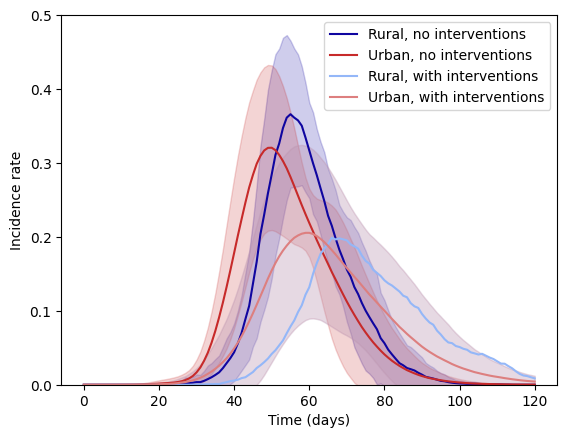

In [11]:
colour_list = ['#0F05A0', '#94B7F8', '#C72A2A', '#DD7F7F']

plt.figure()
plt.fill_between(summary_df['time'],
                 summary_df['rural_prop'] - summary_df['sd_rural_prop'], 
                 summary_df['rural_prop'] + summary_df['sd_rural_prop'], 
                 color='#0F05A0', alpha=0.2)
plt.fill_between(summary_df['time'], 
                 summary_df['urban_prop'] - summary_df['sd_urban_prop'], 
                 summary_df['urban_prop'] + summary_df['sd_urban_prop'], 
                 color='#C72A2A', alpha=0.2)
plt.fill_between(summary_df_int['time'], 
                 summary_df_int['urban_prop'] - summary_df_int['sd_urban_prop'], 
                 summary_df_int['urban_prop'] + summary_df_int['sd_urban_prop'], 
                 color='#94B7F8', alpha=0.2)
plt.fill_between(summary_df_int['time'], 
                 summary_df_int['urban_prop'] - summary_df_int['sd_urban_prop'], 
                 summary_df_int['urban_prop'] + summary_df_int['sd_urban_prop'], 
                 color='#DD7F7F', alpha=0.2)

plt.plot(summary_df['time'], summary_df['rural_prop'], color = '#0F05A0', label='Rural, no interventions')
plt.plot(summary_df['time'], summary_df['urban_prop'], color = '#C72A2A', label='Urban, no interventions')
plt.plot(summary_df_int['time'], summary_df_int['rural_prop'], color = '#94B7F8', label='Rural, with interventions')
plt.plot(summary_df_int['time'], summary_df_int['urban_prop'], color = '#DD7F7F', label='Urban, with interventions')
plt.legend()

plt.xlabel('Time (days)')
plt.ylabel('Incidence rate')
plt.ylim([0,0.5])
plt.show()

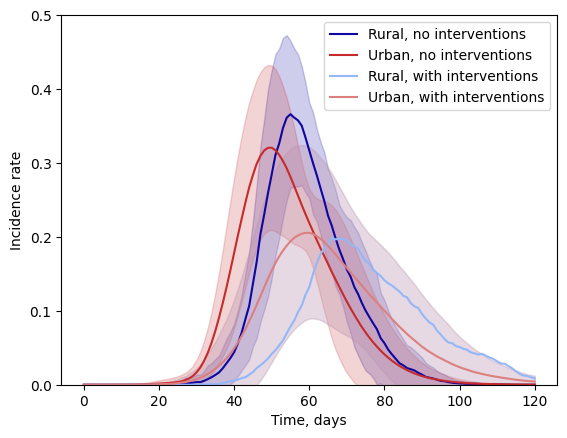

In [ ]:
colour_list = ['#0F05A0', '#94B7F8', '#C72A2A', '#DD7F7F']

plt.figure()
plt.fill_between(summary_df['time'], 
                 summary_df['rural_prop'] - summary_df['sd_rural_prop'], 
                 summary_df['rural_prop'] + summary_df['sd_rural_prop'], 
                 color='#0F05A0', alpha=0.2)
plt.fill_between(summary_df['time'], 
                 summary_df['urban_prop'] - summary_df['sd_urban_prop'], 
                 summary_df['urban_prop'] + summary_df['sd_urban_prop'], 
                 color='#C72A2A', alpha=0.2)
plt.fill_between(summary_df_int['time'], 
                 summary_df_int['urban_prop'] - summary_df_int['sd_urban_prop'], 
                 summary_df_int['urban_prop'] + summary_df_int['sd_urban_prop'], 
                 color='#94B7F8', alpha=0.2)
plt.fill_between(summary_df_int['time'], 
                 summary_df_int['urban_prop'] - summary_df_int['sd_urban_prop'], 
                 summary_df_int['urban_prop'] + summary_df_int['sd_urban_prop'], 
                 color='#DD7F7F', alpha=0.2)

plt.plot(summary_df['time'], summary_df['rural_prop'], color = '#0F05A0', label='Rural, no interventions')
plt.plot(summary_df['time'], summary_df['urban_prop'], color = '#C72A2A', label='Urban, no interventions')
plt.plot(summary_df_int['time'], summary_df_int['rural_prop'], color = '#94B7F8', label='Rural, with interventions')
plt.plot(summary_df_int['time'], summary_df_int['urban_prop'], color = '#DD7F7F', label='Urban, with interventions')
plt.legend()

plt.xlabel('Time (days)')
plt.ylabel('Incidence rate')
plt.ylim([0,0.5])
plt.show()

We then process the data relating to the number of infections in the rural and urban regions and compare the results from prior to the spatial change and after the spatial change, the data here is achieved by running the file `luxembourg_repeat_sims_loc_cst.py` on pyEpiabm version 1.0.1. 

Pre-change:

In [ ]:
combined_df_pre = pd.DataFrame()
combined_df_prop_pre = pd.DataFrame()

for i in (range(1, 11)):
    filename = os.path.join(os.path.abspath(''),
                            "simulation_outputs/large_csv/",
                            "pre_population_output_simulation_{}.csv".format(i))
    df = pd.read_csv(filename)

    rural = df.loc[(df['location_y'] < 49.81) & (df['location_y'] > 49.78) & (df['location_x'] < 6.184) & (df['location_x'] > 6.158)]
    urban = df.loc[(df['location_y'] < 49.626) & (df['location_y'] > 49.599) & (df['location_x'] < 6.142) & (df['location_x'] > 6.116)]

    sum_rural_all = rural.loc[rural['time']==0].sum()
    sum_urban_all = urban.loc[urban['time']==0].sum()

    sum_rural = sum(sum_rural_all[5:])
    sum_urban = sum(sum_urban_all[5:])

    rural_I = rural[list(rural.filter(regex='InfectionStatus.Infect'))]
    rural["Infected"] = rural_I.sum(axis=1)
    rural = rural.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_pre["rural_{}".format(i)] = rural["Infected"]
    combined_df_prop_pre["rural_{}".format(i)] = [(x/sum_rural) for x in rural["Infected"]]

    urban_I = urban[list(urban.filter(regex='InfectionStatus.Infect'))]
    urban["Infected"] = urban_I.sum(axis=1)
    urban = urban.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_pre["urban_{}".format(i)] = urban["Infected"]
    combined_df_prop_pre["urban_{}".format(i)] = [(x/sum_urban) for x in urban["Infected"]]

summary_df_pre = pd.DataFrame()

all_rural = combined_df_pre[list(combined_df_pre.filter(regex='rural'))]
all_urban = combined_df_pre[list(combined_df_pre.filter(regex='urban'))]
all_rural_prop = combined_df_prop_pre[list(combined_df_prop_pre.filter(regex='rural'))]
all_urban_prop = combined_df_prop_pre[list(combined_df_prop_pre.filter(regex='urban'))]

summary_df_pre["rural"] = all_rural.mean(axis=1)
summary_df_pre["sd_rural"] = all_rural.std(axis=1)
summary_df_pre["urban"] = all_urban.mean(axis=1)
summary_df_pre["sd_urban"] = all_urban.std(axis=1)
summary_df_pre["rural_prop"] = all_rural_prop.mean(axis=1)
summary_df_pre["sd_rural_prop"] = all_rural_prop.std(axis=1)
summary_df_pre["urban_prop"] = all_urban_prop.mean(axis=1)
summary_df_pre["sd_urban_prop"] = all_urban_prop.std(axis=1)

time_list = []
for i in range(len(summary_df_pre["rural"])):
    time_list.append(i)

summary_df_pre["time"] = time_list
summary_df_pre.to_csv("simulation_outputs/urban_rural_pre_summary.csv", index=False)

/tmp/ipykernel_10389/2504460525.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural["Infected"] = rural_I.sum(axis=1)
/tmp/ipykernel_10389/2504460525.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban["Infected"] = urban_I.sum(axis=1)
/tmp/ipykernel_10389/2504460525.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

We again read and process the results for the simulations without interventions and post our spatial fix, the simulation file that needs to be run for these simulations is `luxembourg_repeat_sims_loc_cst.py`:

In [ ]:
combined_df_post = pd.DataFrame()
combined_df_prop_post = pd.DataFrame()

for i in (range(1, 11)):
    filename = os.path.join(os.path.abspath(''),
                            "simulation_outputs/large_csv/",
                            "population_output_simulation_{}.csv".format(i))
    df = pd.read_csv(filename)

    rural = df.loc[(df['location_y'] < 49.81) & (df['location_y'] > 49.78) & (df['location_x'] < 6.184) & (df['location_x'] > 6.158)]
    urban = df.loc[(df['location_y'] < 49.626) & (df['location_y'] > 49.599) & (df['location_x'] < 6.142) & (df['location_x'] > 6.116)]

    sum_rural_all = rural.loc[rural['time']==0].sum()
    sum_urban_all = urban.loc[urban['time']==0].sum()

    sum_rural = sum(sum_rural_all[5:])
    sum_urban = sum(sum_urban_all[5:])

    rural_I = rural[list(rural.filter(regex='InfectionStatus.Infect'))]
    rural["Infected"] = rural_I.sum(axis=1)
    rural = rural.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_post["rural_{}".format(i)] = rural["Infected"]
    combined_df_prop_post["rural_{}".format(i)] = [(x/sum_rural) for x in rural["Infected"]]

    urban_I = urban[list(urban.filter(regex='InfectionStatus.Infect'))]
    urban["Infected"] = urban_I.sum(axis=1)
    urban = urban.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_post["urban_{}".format(i)] = urban["Infected"]
    combined_df_prop_post["urban_{}".format(i)] = [(x/sum_urban) for x in urban["Infected"]]

summary_df_post = pd.DataFrame()

all_rural = combined_df_post[list(combined_df_post.filter(regex='rural'))]
all_urban = combined_df_post[list(combined_df_post.filter(regex='urban'))]
all_rural_prop = combined_df_prop_post[list(combined_df_prop_post.filter(regex='rural'))]
all_urban_prop = combined_df_prop_post[list(combined_df_prop_post.filter(regex='urban'))]

summary_df_post["rural"] = all_rural.mean(axis=1)
summary_df_post["sd_rural"] = all_rural.std(axis=1)
summary_df_post["urban"] = all_urban.mean(axis=1)
summary_df_post["sd_urban"] = all_urban.std(axis=1)
summary_df_post["rural_prop"] = all_rural_prop.mean(axis=1)
summary_df_post["sd_rural_prop"] = all_rural_prop.std(axis=1)
summary_df_post["urban_prop"] = all_urban_prop.mean(axis=1)
summary_df_post["sd_urban_prop"] = all_urban_prop.std(axis=1)

time_list = []
for i in range(len(summary_df_post["rural"])):
    time_list.append(i)

summary_df_post["time"] = time_list
summary_df_post.to_csv("simulation_outputs/urban_rural_post_summary.csv", index=False)

/tmp/ipykernel_10389/2212137708.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural["Infected"] = rural_I.sum(axis=1)
/tmp/ipykernel_10389/2212137708.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban["Infected"] = urban_I.sum(axis=1)
/tmp/ipykernel_10389/2212137708.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Then plot the results:

In [5]:
# colour_list = ['#0F05A0', '#94B7F8', '#2AC7C7', '#B5F4F4']
colour_list = ['#0F05A0', '#94B7F8', '#C72A2A', '#DD7F7F']

# summary_df_post.to_csv("urban_rural_post_summary.csv", index=False)

plt.figure()
plt.plot(summary_df_pre['time'], summary_df_pre['rural_prop'], color = '#0F05A0', label='Rural, pre-spatial change')
plt.plot(summary_df_pre['time'], summary_df_pre['urban_prop'], color = '#C72A2A', label='Urban, pre-spatial change')
plt.plot(summary_df_post['time'], summary_df_post['rural_prop'], color = '#94B7F8', label='Rural, post-spatial change')
plt.plot(summary_df_post['time'], summary_df_post['urban_prop'], color = '#DD7F7F', label='Urban, post-spatial change')
plt.legend()
plt.fill_between(summary_df_pre['time'], 
                 summary_df_pre['rural_prop'] - summary_df_pre['sd_rural_prop'], 
                 summary_df_pre['rural_prop'] + summary_df_pre['sd_rural_prop'], 
                 color='#0F05A0', alpha=0.2)
plt.fill_between(summary_df_pre['time'], 
                 summary_df_pre['urban_prop'] - summary_df_pre['sd_urban_prop'], 
                 summary_df_pre['urban_prop'] + summary_df_pre['sd_urban_prop'], 
                 color='#C72A2A', alpha=0.2)
plt.fill_between(summary_df_post['time'], 
                 summary_df_post['urban_prop'] - summary_df_post['sd_urban_prop'], 
                 summary_df_post['urban_prop'] + summary_df_post['sd_urban_prop'], 
                 color='#94B7F8', alpha=0.2)
plt.fill_between(summary_df_post['time'], 
                 summary_df_post['urban_prop'] - summary_df_post['sd_urban_prop'], 
                 summary_df_post['urban_prop'] + summary_df_post['sd_urban_prop'], 
                 color='#DD7F7F', alpha=0.2)

plt.xlabel('Time, days')
plt.ylabel('Incidence rate')
plt.ylim([0,0.5])
plt.show()

NameError: name 'summary_df_pre' is not defined

<Figure size 640x480 with 0 Axes>

Finally process and plot the results from the pre and post spatial change for the overall SIR curves.

Pre-change:

In [61]:
combined_df_all_pre = pd.DataFrame()

for i in (range(1, 11)):
    filename = os.path.join(os.path.abspath(''),
                            "simulation_outputs/large_csv",
                            "pre_population_output_simulation_{}.csv".format(i))
    df = pd.read_csv(filename)

    df_I = df[list(df.filter(regex='InfectionStatus.Infect'))]
    df["Infected"] = df_I.sum(axis=1)
    df = df.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_all_pre["Infected_{}".format(i)] = df["Infected"]

summary_df_all_pre = pd.DataFrame()

all_infections = combined_df_all_pre[list(combined_df_all_pre.filter(regex='Infected'))]

summary_df_all_pre["av_infections"] = all_infections.mean(axis=1)
summary_df_all_pre["sd_infections"] = all_infections.std(axis=1)

time_list = []
for i in range(len(summary_df_all_pre["av_infections"])):
    time_list.append(i)

summary_df_all_pre["time"] = time_list
summary_df_all_pre.to_csv("simulation_outputs/all_pre_summary.csv", index=False)

Post change:

In [62]:
combined_df_all_post = pd.DataFrame()

for i in (range(1, 11)):
    filename = os.path.join(os.path.abspath(''),
                            "simulation_outputs/large_csv",
                            "population_output_simulation_{}.csv".format(i))
    df = pd.read_csv(filename)

    df_I = df[list(df.filter(regex='InfectionStatus.Infect'))]
    df["Infected"] = df_I.sum(axis=1)
    df = df.groupby(["time"]).agg({"Infected": 'sum'})

    combined_df_all_post["Infected_{}".format(i)] = df["Infected"]

summary_df_all_post = pd.DataFrame()

all_infections = combined_df_all_post[list(combined_df_all_post.filter(regex='Infected'))]

summary_df_all_post["av_infections"] = all_infections.mean(axis=1)
summary_df_all_post["sd_infections"] = all_infections.std(axis=1)

time_list = []
for i in range(len(summary_df_all_post["av_infections"])):
    time_list.append(i)

summary_df_all_post["time"] = time_list
summary_df_all_post.to_csv("simulation_outputs/all_post_summary.csv", index=False)

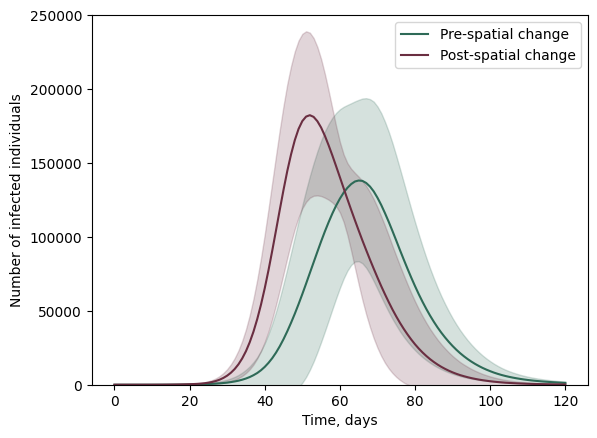

In [65]:
colour_list = ['#2E6A57', '#6a2e41']

plt.figure()
plt.plot(summary_df_all_pre['time'], summary_df_all_pre['av_infections'], color = '#2E6A57', label='Pre-spatial change')
plt.plot(summary_df_all_post['time'], summary_df_all_post['av_infections'], color = '#6a2e41', label='Post-spatial change')
plt.legend()
plt.fill_between(summary_df_all_pre['time'], 
                 summary_df_all_pre['av_infections'] - summary_df_all_pre['sd_infections'], 
                 summary_df_all_pre['av_infections'] + summary_df_all_pre['sd_infections'], 
                 color='#2E6A57', alpha=0.2)
plt.fill_between(summary_df_all_post['time'], 
                 summary_df_all_post['av_infections'] - summary_df_all_post['sd_infections'], 
                 summary_df_all_post['av_infections'] + summary_df_all_post['sd_infections'], 
                 color='#6a2e41', alpha=0.2)

plt.xlabel('Time, days')
plt.ylabel('Number of infected individuals')
plt.ylim([0,250000])
plt.show()